# 10-05 나이브 베이즈 분류기(Naive Bayes Classifier)

나이브 베이즈 분류기는 인공 신경망 알고리즘에는 속하지 않지만, 머신 러닝의 주요 알고리즘으로 분류에 있어 준수한 성능을 보여주는 것으로 알려져 있습니다.

## 베이즈의 정리(Bayes' theorem)를 이용한 분류 메커니즘

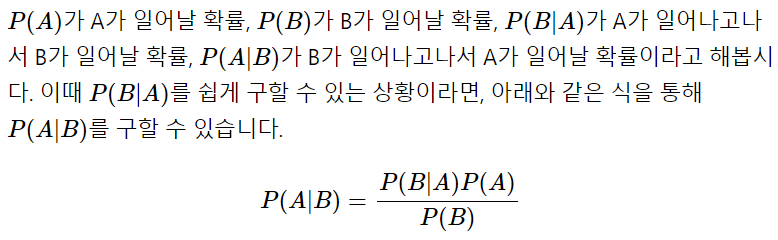

## 스팸 메일 분류기(Spam Detection)

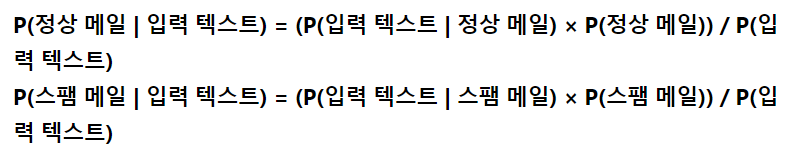  
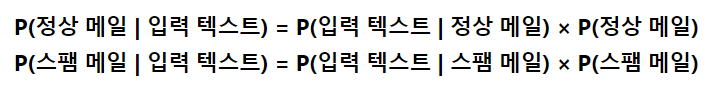  
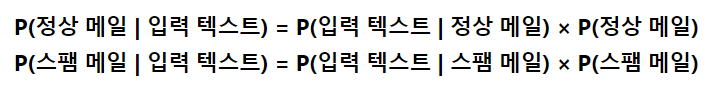

## 뉴스그룹 데이터 분류하기(Classification of 20 News Group with Naive Bayes Classifier)

사이킷 런에서는 Twenty Newsgroups이라고 불리는 20개의 다른 주제를 가진 18,846개의 뉴스그룹 데이터를 제공합니다. 해당 데이터는 이미 훈련 데이터(11,314개)와 테스트 데이터(7,532개)를 미리 분류해놓았기 때문에 별도로 훈련 데이터와 테스트 데이터를 분류할 필요는 없습니다.

### 뉴스그룹 데이터에 대한 이해

In [1]:
from sklearn.datasets import fetch_20newsgroups
newsdata=fetch_20newsgroups(subset='train')
print(newsdata.keys())

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])


In [2]:
print (len(newsdata.data), len(newsdata.filenames), len(newsdata.target_names), len(newsdata.target))

11314 11314 20 11314


In [3]:
print(newsdata.target_names)

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [7]:
print(newsdata.target[0])

7


In [8]:
print(newsdata.target_names[7])

rec.autos


In [17]:
print(newsdata.data[0])

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----







### 나이브 베이즈 분류

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB # 다항분포 나이브 베이즈 모델
from sklearn.metrics import accuracy_score #정확도 계산

# 나이브 베이즈 분류를 위해서는 데이터를 BoW로 만들어줄 필요가 있습니다.
# 여기서는 입력한 텍스트를 자동으로 BoW로 만드는 CountVectorizer를 사용합니다. 
dtmvector = CountVectorizer()
X_train_dtm = dtmvector.fit_transform(newsdata.data)
print(X_train_dtm.shape) # DTM 완성

(11314, 130107)


이제 자동으로 DTM이 완성되었습니다. 11,314는 훈련용 샘플의 개수이고 DTM 관점에서는 문서의 수가 되겠습니다. 130,107은 전체 훈련 데이터에 등장한 단어의 수를 의미합니다.  
물론, DTM을 그대로 나이브 베이즈 분류기에 사용할 수도 있겠지만 DTM 행렬 대신 TF-IDF 가중치를 적용한 TF-IDF 행렬을 입력으로 텍스트 분류를 수행하면, 성능의 개선을 얻을 수도 있습니다. (DTM 챕터 참고) 주의할 점은 TF-IDF 행렬이 항상 DTM으로 수행했을 때보다 성능이 뛰어나지는 않습니다. 사이킷런은 TF-IDF를 자동 계산해주는 TfidVectorizer 클래스를 제공하므로 이를 사용해보겠습니다.

In [19]:
tfidf_transformer = TfidfTransformer()
tfidfv = tfidf_transformer.fit_transform(X_train_dtm)
print(tfidfv.shape) # TF-IDF 행렬 완성

(11314, 130107)


In [20]:
# 나이브 베이즈 분류를 수행
mod = MultinomialNB()
mod.fit(tfidfv, newsdata.target)

MultinomialNB()

In [21]:
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True) # alpha=1.0 -> 라플라스 스무딩이 적용

MultinomialNB()

In [22]:
newsdata_test = fetch_20newsgroups(subset='test', shuffle=True) #테스트 데이터 갖고오기
X_test_dtm = dtmvector.transform(newsdata_test.data) #테스트 데이터를 DTM으로 변환
tfidfv_test = tfidf_transformer.transform(X_test_dtm) #DTM을 TF-IDF 행렬로 변환

predicted = mod.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(newsdata_test.target, predicted)) #예측값과 실제값 비교

정확도: 0.7738980350504514
